In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [2]:
# Get the seed
import numpy as np
np.random.seed(2676)

In [3]:
# Get the data
all_data = pd.read_csv("input_data/model_ready_data.csv")

### Test/Train Split

In [4]:
# Get the y and x data in different variables
y_label = all_data["PRICE"]
X_data = all_data.drop(columns=["PRICE", "index", "TYPE", "LOCALITY", "SUBLOCALITY"])

# Split the data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_data, y_label, test_size=0.3, random_state=43)

In [5]:
X_data

,BROKERTITLE,BEDS,BATH,PROPERTYSQFT,STATE,STREET_NAME,TYPE_is_Co-op for sale,TYPE_is_Coming Soon,TYPE_is_Condo for sale,TYPE_is_Condop for sale,...,SUBLOCALITY_is_New York,SUBLOCALITY_is_New York County,SUBLOCALITY_is_Queens,SUBLOCALITY_is_Queens County,SUBLOCALITY_is_Rego Park,SUBLOCALITY_is_Richmond County,SUBLOCALITY_is_Riverdale,SUBLOCALITY_is_Snyder Avenue,SUBLOCALITY_is_Staten Island,SUBLOCALITY_is_The Bronx
0,100.000,2,2.000000,1400.000000,100.000,100.000,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,100.001,7,10.000000,17545.000000,100.001,100.001,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
2,100.002,4,2.000000,2015.000000,100.002,100.002,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,100.003,3,1.000000,445.000000,100.003,100.001,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
4,100.004,7,2.373861,14175.000000,100.004,100.001,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,100.003,1,1.000000,2184.207862,100.206,100.004,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4793,100.302,1,1.000000,2184.207862,100.018,100.011,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4794,100.005,1,1.000000,2184.207862,100.158,100.001,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4795,100.034,2,1.000000,655.000000,100.013,100.008,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False


In [6]:
print(f"X Train Data Length = {len(train_X)} \t\t X Test Data Length = {len(test_X)} \n Y Train Data Length = {len(train_y)} \t\t Y Test Data Length = {len(test_y)}")

X Train Data Length = 3357 		 X Test Data Length = 1440 
 Y Train Data Length = 3357 		 Y Test Data Length = 1440


### Linear Regression Model

In [7]:
# Set model
regression_model = LinearRegression()
# Fit model
regression_model.fit(train_X, train_y)

LinearRegression()

In [8]:
# Make predictions using the testing set
y_pred = regression_model.predict(test_X)

### Model Prediction Statistics

In [9]:
# Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Coefficient of Determination (R-squared)
r_squared = r2_score(test_y, y_pred)
print(f'Coefficient of Determination (R-squared): {r_squared}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Define the number of folds (k)
# You can adjust this based on your preference
num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation for R-squared
cross_val_r_squared = cross_val_score(regression_model, train_X, train_y, cv=kf, scoring='r2')

# Display the results
print(f'K-fold Cross-validated R-squared: {np.mean(cross_val_r_squared)}')

Mean Squared Error (MSE): 9107434027374.809
Coefficient of Determination (R-squared): 0.430795214272506
Mean Absolute Error (MAE): 1302401.665060892
Root Mean Squared Error (RMSE): 3017852.552291912
K-fold Cross-validated R-squared: 0.2906845283426377


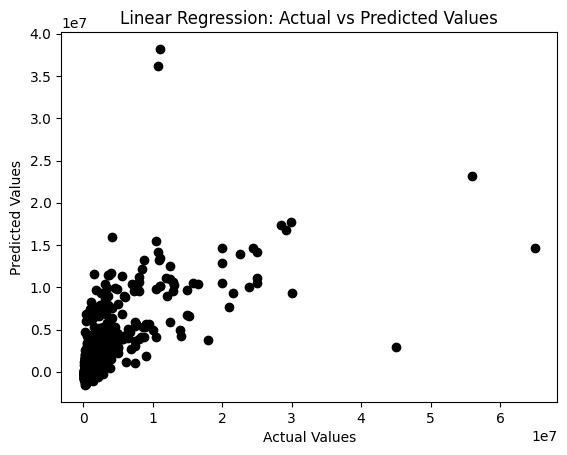

In [10]:
# Plot outputs
plt.scatter(test_y, y_pred, color="black")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted Values")
plt.savefig('output/lin_reg.jpg')
plt.show()

In [11]:
coeff = pd.DataFrame(list(zip(regression_model.feature_names_in_, regression_model.coef_)), columns = ['Feature', 'Weight'])
coeff.sort_values('Weight')

,Feature,Weight
4,STATE,-4.155326e+06
46,SUBLOCALITY_is_Richmond County,-1.757616e+06
30,SUBLOCALITY_is_Bronx County,-1.351643e+06
33,SUBLOCALITY_is_Coney Island,-1.240103e+06
44,SUBLOCALITY_is_Queens County,-1.139810e+06
7,TYPE_is_Coming Soon,-1.066355e+06
39,SUBLOCALITY_is_Kings County,-1.007049e+06
11,TYPE_is_For sale,-9.207824e+05
9,TYPE_is_Condop for sale,-8.700101e+05
36,SUBLOCALITY_is_Flushing,-8.196810e+05


([<matplotlib.axis.XTick at 0x1f0b8490a30>,
 [Text(1, 0, 'TYPE'), Text(2, 0, 'LOCALITY'), Text(3, 0, 'SUBLOCALITY')])

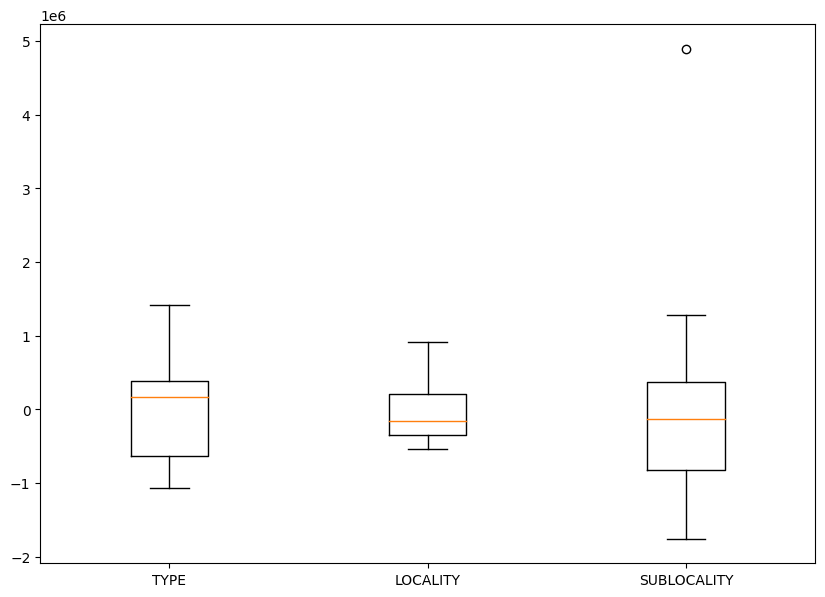

In [12]:
one_hot_attribute_list = ["TYPE", "LOCALITY", "SUBLOCALITY"]

features = coeff["Feature"]
weights = coeff["Weight"]

box_plot_dict = {
    "TYPE": [],
    "LOCALITY": [],
    "SUBLOCALITY": [],
}

for attribute in one_hot_attribute_list:
    for i in range(len(features)):
        feature = str(features[i])
        if feature.startswith(attribute):
            box_plot_dict[attribute].append(weights[i])

fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot([box_plot_dict["TYPE"], box_plot_dict["LOCALITY"], box_plot_dict["SUBLOCALITY"]])
plt.xticks(range(1, len(one_hot_attribute_list) + 1), one_hot_attribute_list)